# PRINCIPAL COMPONENT ANALYSIS

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load Dataset
mush = pd.read_csv('mushrooms.csv')

In [3]:
#First five columns
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#Dataset information
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
#Statistical information
mush.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [6]:
#Extract color columns
mush_colors = []
for m in mush.columns:
    if 'color' in m:
        mush_colors.append(m)

In [7]:
#Create color dataframe
mush_color = mush[mush_colors]
mush_color.head(5)

,cap-color,gill-color,stalk-color-above-ring,stalk-color-below-ring,veil-color,spore-print-color
0,n,k,w,w,w,k
1,y,k,w,w,w,n
2,w,n,w,w,w,n
3,w,n,w,w,w,k
4,g,k,w,w,w,n


In [8]:
#Encoding
from sklearn.preprocessing import LabelEncoder

encodeList = pd.Series(mush_color.values.ravel()).unique()

mushList = LabelEncoder().fit_transform(encodeList)

mushdict = {}
for m in range(0, len(mushList)):
    mushdict.update({encodeList[m]:mushList[m]})

for d in range(len(mush_color.columns)):
    for e in range(len(mush_color['cap-color'].values)):
        mush_color.values[e][d] =  mushdict[mush_color.values[e][d]]
mush_color.head()     

,cap-color,gill-color,stalk-color-above-ring,stalk-color-below-ring,veil-color,spore-print-color
0,6,5,11,11,11,5
1,12,5,11,11,11,6
2,11,6,11,11,11,6
3,11,6,11,11,11,5
4,3,5,11,11,11,6


In [9]:
#Confusion matrix
mush_corr = mush_color.astype(float).corr() 
mush_corr

,cap-color,gill-color,stalk-color-above-ring,stalk-color-below-ring,veil-color,spore-print-color
cap-color,1.000000,0.097253,0.089248,0.093015,-0.001314,-0.233534
gill-color,0.097253,1.000000,-0.058458,-0.074540,-0.107792,-0.474733
stalk-color-above-ring,0.089248,-0.058458,1.000000,0.509303,0.079030,0.225851
stalk-color-below-ring,0.093015,-0.074540,0.509303,1.000000,0.077198,0.209170
veil-color,-0.001314,-0.107792,0.079030,0.077198,1.000000,0.036781
spore-print-color,-0.233534,-0.474733,0.225851,0.209170,0.036781,1.000000


<AxesSubplot:title={'center':'Mushroom Correlation'}>

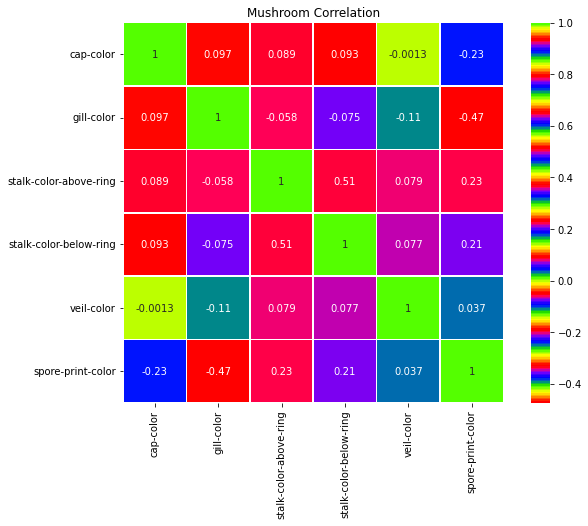

In [10]:
 #Visualize matrix
f, ax = plt.subplots(figsize=(10, 7))
plt.title('Mushroom Correlation')

sns.heatmap(mush_color.astype(float).corr(),linewidths=0.5,vmax=1.0, square=True, annot=True, cmap='prism')

In [11]:
# import libraries
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

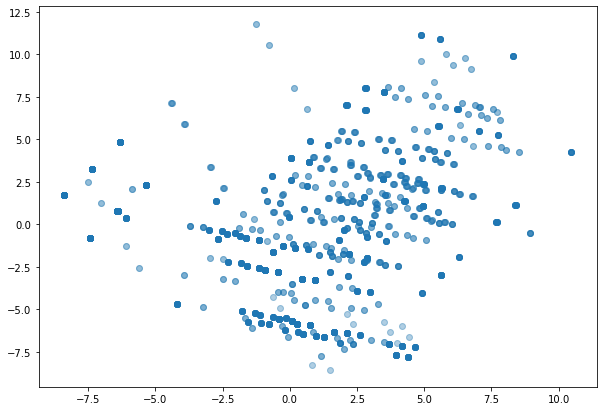

In [12]:
#Instatntiate
mush_x = mush_color.values

mush_pca = PCA(n_components=3)

mush_3d = mush_pca.fit_transform(mush_x)

plt.figure(figsize = (10,7))
plt.scatter(mush_3d[:,0],mush_3d[:,1], alpha=0.1)
plt.show()

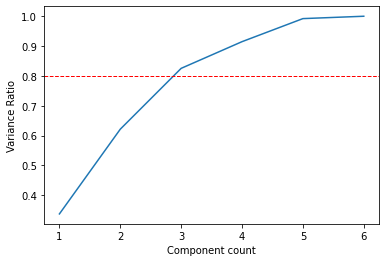

In [16]:
pca = PCA().fit(mush_x)
x = range(1,7)
plt.plot(x,np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.8, color='r', linestyle='--', linewidth=1)
plt.xticks(list(range(1,7)))
plt.xlabel("Component count")
plt.ylabel("Variance Ratio");

In [17]:
pca.explained_variance_ratio_

array([0.33710631, 0.28418613, 0.20398659, 0.08949993, 0.07729449,
       0.00792654])

In [13]:
#K-Means
mush_k = KMeans(n_clusters=3, random_state=0)

mush_cluster = mush_k.fit_predict(mush_3d)

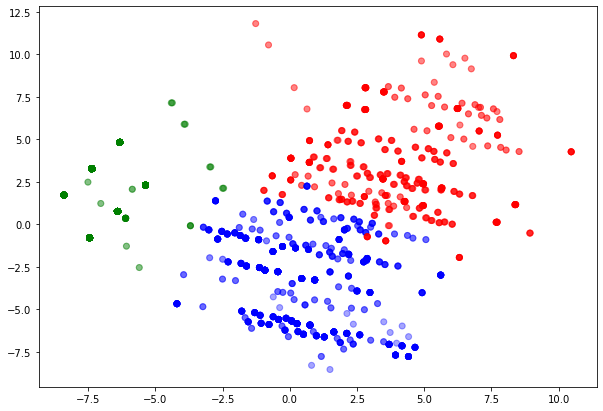

In [14]:
#Visualize
colors = {0 : 'b',
          1 : 'r',
          2 : 'g'}

labels = [colors[l] for l in mush_cluster]
plt.figure(figsize = (10,7))
plt.scatter(mush_3d[:,0],mush_3d[:,1], c= labels, alpha=0.1)
plt.show()